In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv('train.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

## EDA

In [3]:
house.shape

(1168, 81)

Shape of our dataset 1168, 81

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

**Information of the dataset**
- RangeIndex: 0 to 1167
- Total Columns: 81 columns
- dtypes: float64(3), int64(35), object(43)

In [5]:
house.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

**Description of Dataset:**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

## Null Values

In [6]:
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

These are the columns with null values.

**- Graph of Null Columns.**

In [7]:
house.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)
house.shape

(1168, 78)

Dropping the Columns which has 70% of Null Values.

**- Filling the Null Values.**

In [8]:
null = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence']

In [9]:
for i in null:
    print('\n',i)
    print(house[i].unique(),'\n ----------------------------------------')


 LotFrontage
[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.] 
 ----------------------------------------

 MasVnrType
['None' 'BrkFace' 'Stone' 'BrkCmn' nan] 
 ----------------------------------------

 MasVnrArea
[0.000e+00 4.800e+02 1.260e+02 1.800e+02 6.700e+01 2.230e+02 6.600e+01
 8.200e+01 1.740e+02 3.040e+02 1.720e+02 1.660e+02 1.840e+02 3.500e+02
 4.120e+02 1.000e+00 1.890e+02 1.120e+02 5.000e+01 2.200e+02 1.600e+01
 6.300e+02 2.810e+02 2.870e+02 3.400e+02 2.160e+02       nan 1.400e+02
 1.830

Unique values for Every columns with Null Values.

**- Filling the values with mean()**

In [10]:
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].mean())

**- Filling the values with median()**

In [11]:
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())

**- Filling the values with mode()**

In [12]:
def fill(x):
    house[x] = house[x].fillna(house[x].mode()[0])

In [13]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence']

In [14]:
for i in n:
    fill(i)

In [15]:
house.columns[house.isnull().any()]

Index([], dtype='object')

Now, No null values present in our dataset.

## Encoding.

In [16]:
ob = []
for col in house:
    if house[col].dtype == 'object':
        ob.append(col)

Finding all the columns with dtype = Object.

In [17]:
for i in ob:
    print('\n',i)
    print(house[i].unique(),'\n ----------------------------------------')


 MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)'] 
 ----------------------------------------

 Street
['Pave' 'Grvl'] 
 ----------------------------------------

 LotShape
['IR1' 'Reg' 'IR2' 'IR3'] 
 ----------------------------------------

 LandContour
['Lvl' 'Bnk' 'HLS' 'Low'] 
 ----------------------------------------

 Utilities
['AllPub'] 
 ----------------------------------------

 LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3'] 
 ----------------------------------------

 LandSlope
['Gtl' 'Mod' 'Sev'] 
 ----------------------------------------

 Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste'] 
 ----------------------------------------

 Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn'] 
 ----------------------------------------

 Condition2
['No

Unique values for Every columns with dtypes = Object.

In [18]:
house.drop('Utilities',axis = 1, inplace = True )

Dropping the column with single value.

In [19]:
ob.remove('Utilities')

**- Encoding every column where dtype = Object.**

In [20]:
lb = LabelEncoder()
for i in ob:
    house[i] = lb.fit_transform(house[i])

In [21]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   LotShape       1168 non-null   int32  
 7   LandContour    1168 non-null   int32  
 8   LotConfig      1168 non-null   int32  
 9   LandSlope      1168 non-null   int32  
 10  Neighborhood   1168 non-null   int32  
 11  Condition1     1168 non-null   int32  
 12  Condition2     1168 non-null   int32  
 13  BldgType       1168 non-null   int32  
 14  HouseStyle     1168 non-null   int32  
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

No Object values present in our dataset.

## Features Selection.

**- Seperating the Features & Target.**

In [22]:
x = house.drop('SalePrice',axis=1)
y = house.SalePrice

**- Applying SelectKBest & F_Classif.**

In [23]:
best_feature = SelectKBest(score_func = f_classif, k =60)
fit = best_feature.fit(x,y)

In [24]:
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [25]:
feature_score = pd.concat([column,score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(40,'Scores')

Feature Name    Scores
15   OverallQual  5.303071
71       MiscVal  3.564855
25     ExterQual  3.514221
44     GrLivArea  2.977506
28      BsmtQual  2.876879
51   KitchenQual  2.617125
59    GarageCars  2.578547
47      FullBath  2.435854
60    GarageArea  2.316328
58  GarageFinish  2.187163
17     YearBuilt  2.133300
41      1stFlrSF  2.036680
36   TotalBsmtSF  1.867714
24    MasVnrArea  1.852976
5         Street  1.835751
4        LotArea  1.826320
18  YearRemodAdd  1.813783
57   GarageYrBlt  1.712783
37       Heating  1.707885
52  TotRmsAbvGrd  1.656866
2       MSZoning  1.640044
54    Fireplaces  1.591973
39    CentralAir  1.557680
27    Foundation  1.528516
32    BsmtFinSF1  1.482500
42      2ndFlrSF  1.476305
65   OpenPorchSF  1.460290
6       LotShape  1.407526
35     BsmtUnfSF  1.401635
38     HeatingQC  1.358939
48      HalfBath  1.337597
10  Neighborhood  1.281079
64    WoodDeckSF  1.254936
30  BsmtExposure  1.214154
55   FireplaceQu  1.203591
29      BsmtCond  1.190161
20      RoofMatl  1.179426
23    MasVnrType  1.171156
56    GarageType  1.169772
49  BedroomAbvGr  1.146460

Score of top 40 columns.

**- Top 40 Features.**

In [26]:
top = house[['OverallQual','MiscVal','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
             'GarageArea','GarageFinish','YearBuilt','1stFlrSF','TotalBsmtSF','MasVnrArea','Street','LotArea',
             'YearRemodAdd','GarageYrBlt','Heating','TotRmsAbvGrd','MSZoning','Fireplaces','CentralAir',
             'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC','HalfBath',
             'Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl','MasVnrType',
             'GarageType','BedroomAbvGr','SalePrice']]

**- Graph with top 40 features with respect to target.**

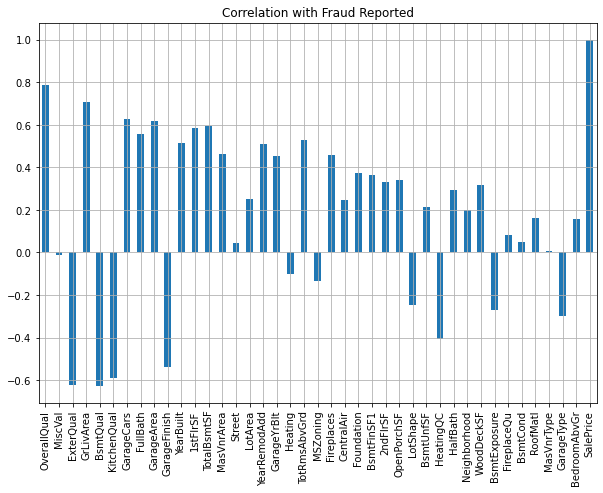

In [27]:
top.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Fraud Reported')
plt.show()

**Found that:**
    
    MasVnrType, MiscVal, are the lowest as compared to other, so dropping these columns.

In [28]:
top.drop(columns = ['MasVnrType','MiscVal'],axis = 1, inplace = True)

## Correlation.

In [29]:
corr = top.corr()
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

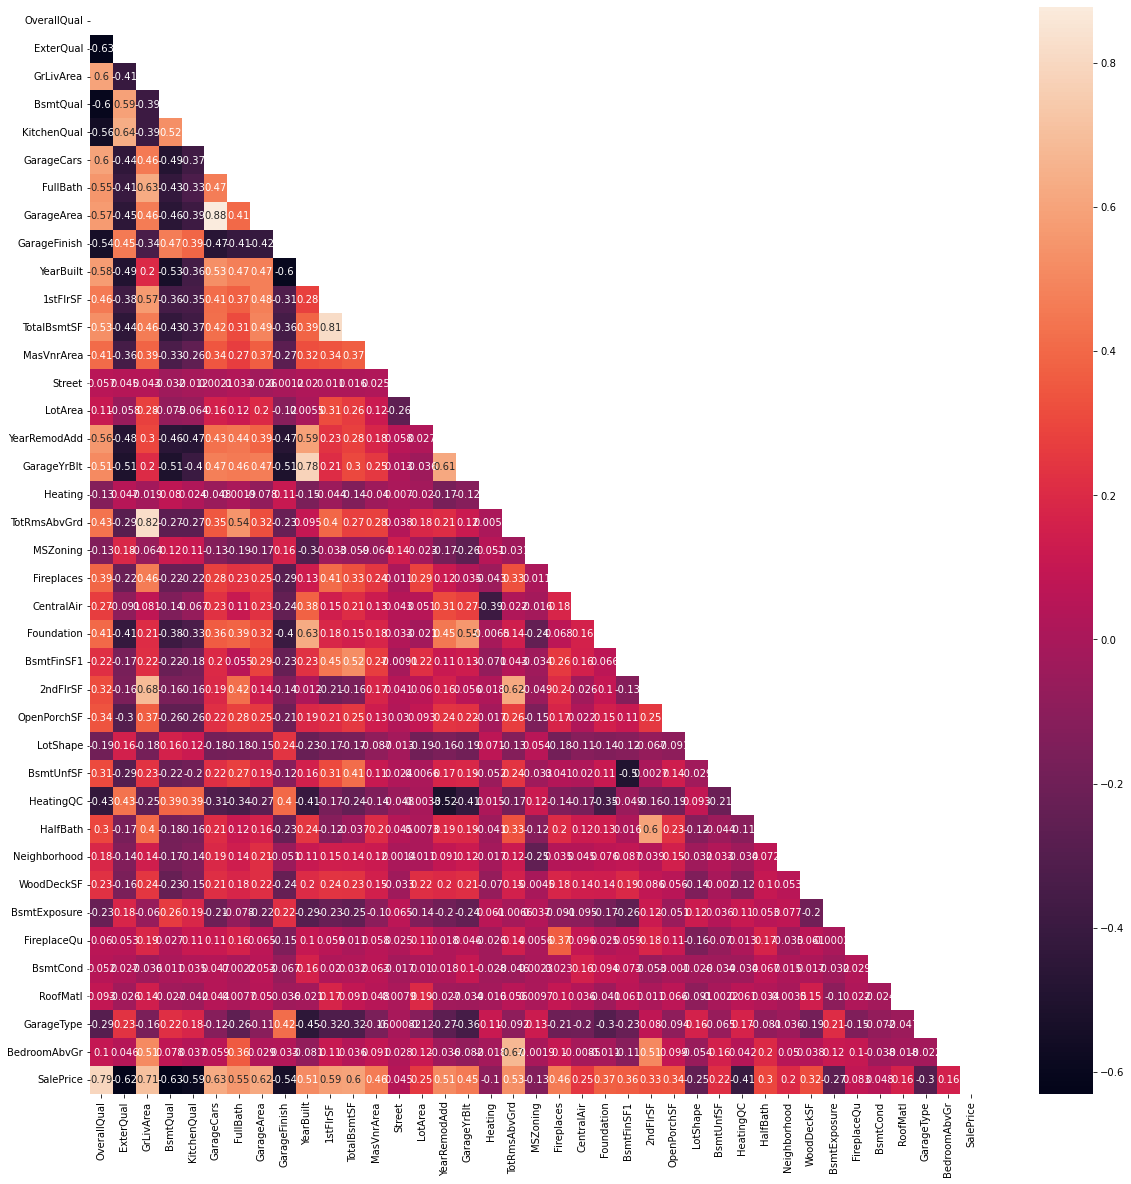

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True,fmt = '.2g',mask = mask)

Dropping the columns whose correlation is more than 80%.

**Found that:**
- TotRmsAbvGrd & GrLivArea, has the correlation of 82%.
- GarageArea & GarageCars, has the correlation of 88%.
- TotalBsmtSF & 1stFlrSF, has the correlation of 81%.

In [31]:
top.drop(columns = ['TotRmsAbvGrd','GarageArea','TotalBsmtSF'],axis = 1, inplace = True)

## Visualization.

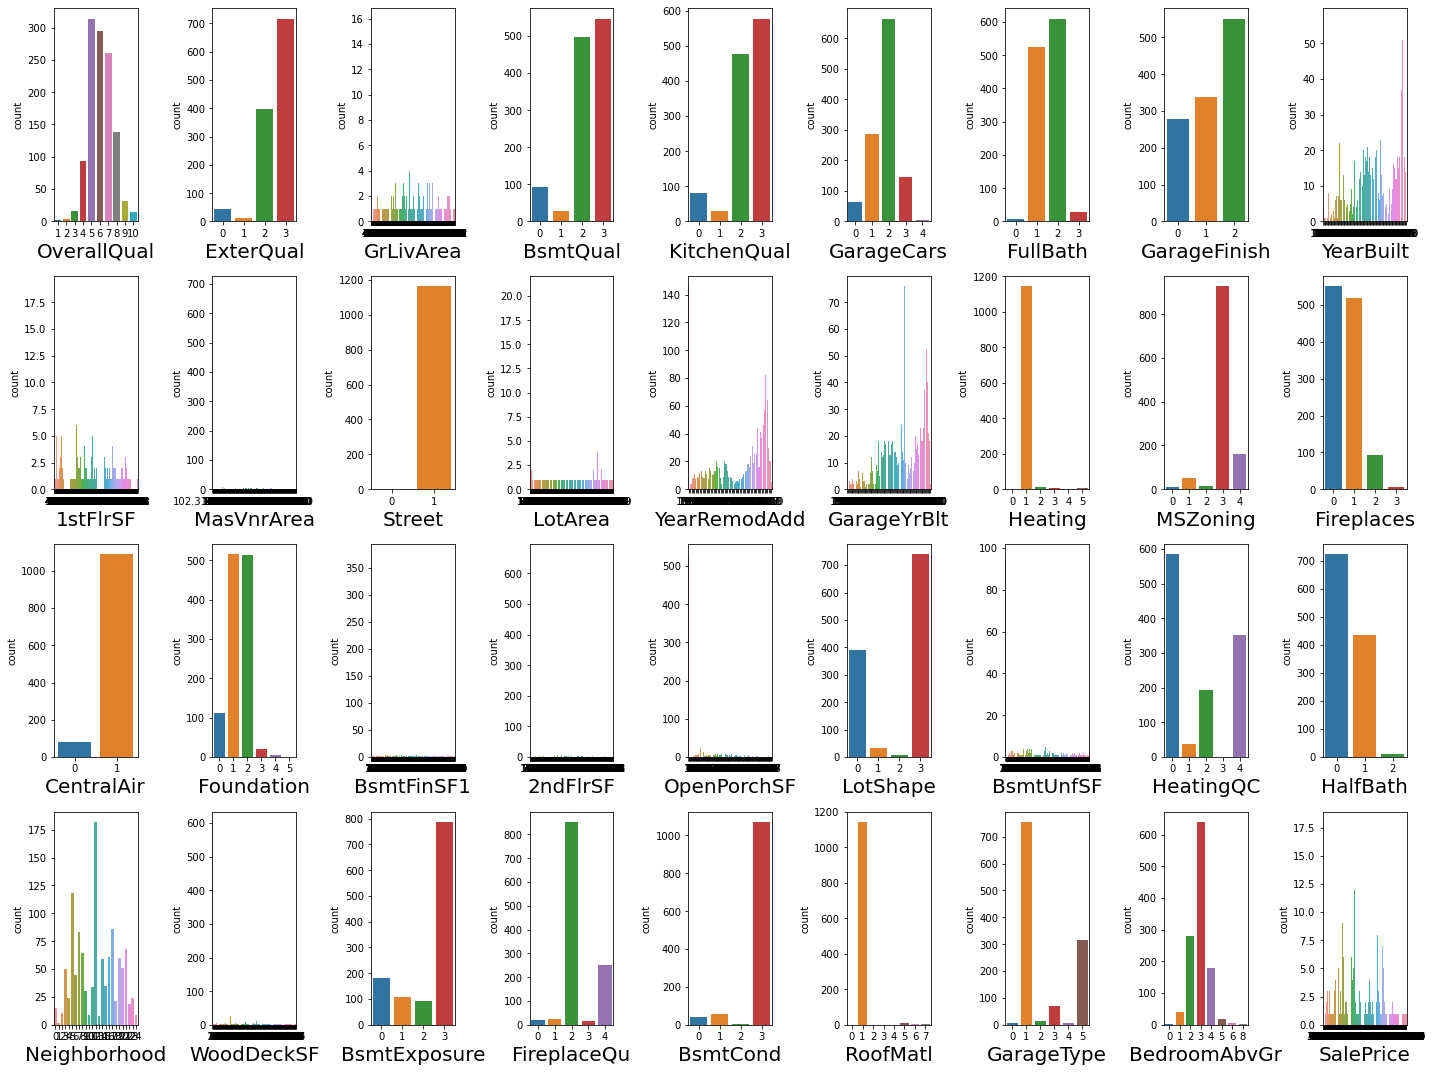

In [32]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.countplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Countplot for top features.

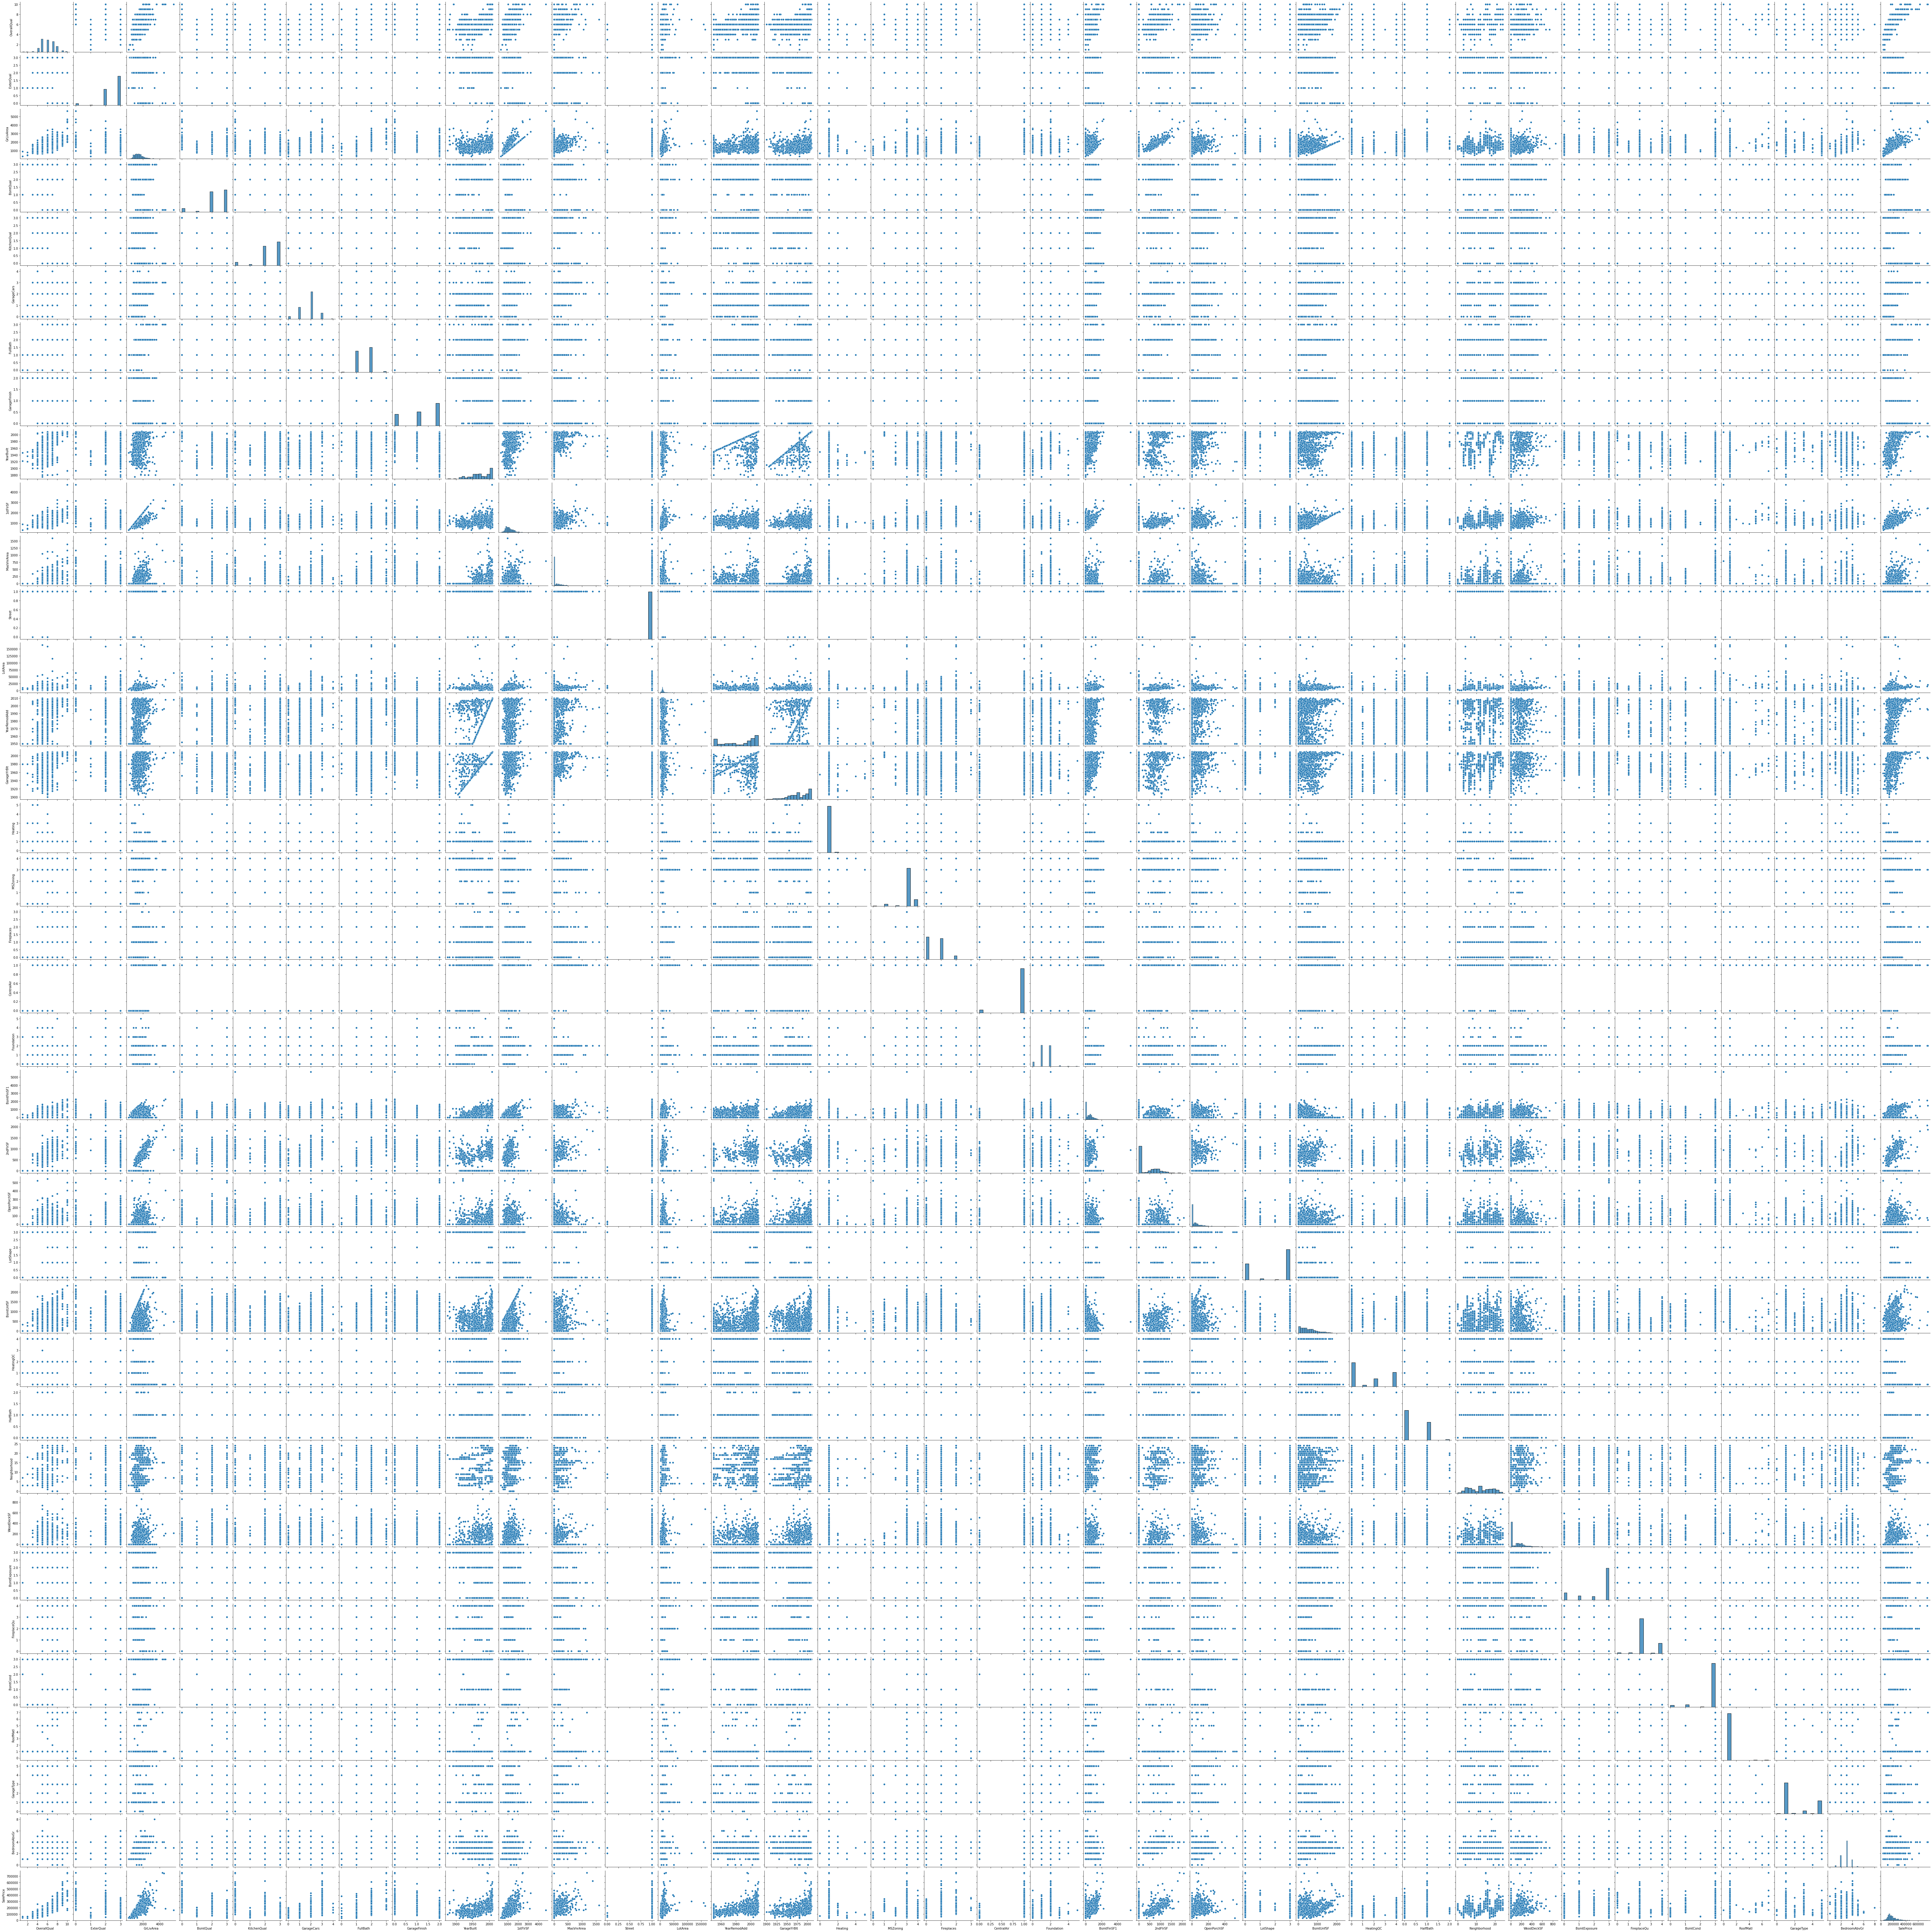

In [33]:
sns.pairplot(top)

Pairplot of Top Features.

**- Normal Distribution.**

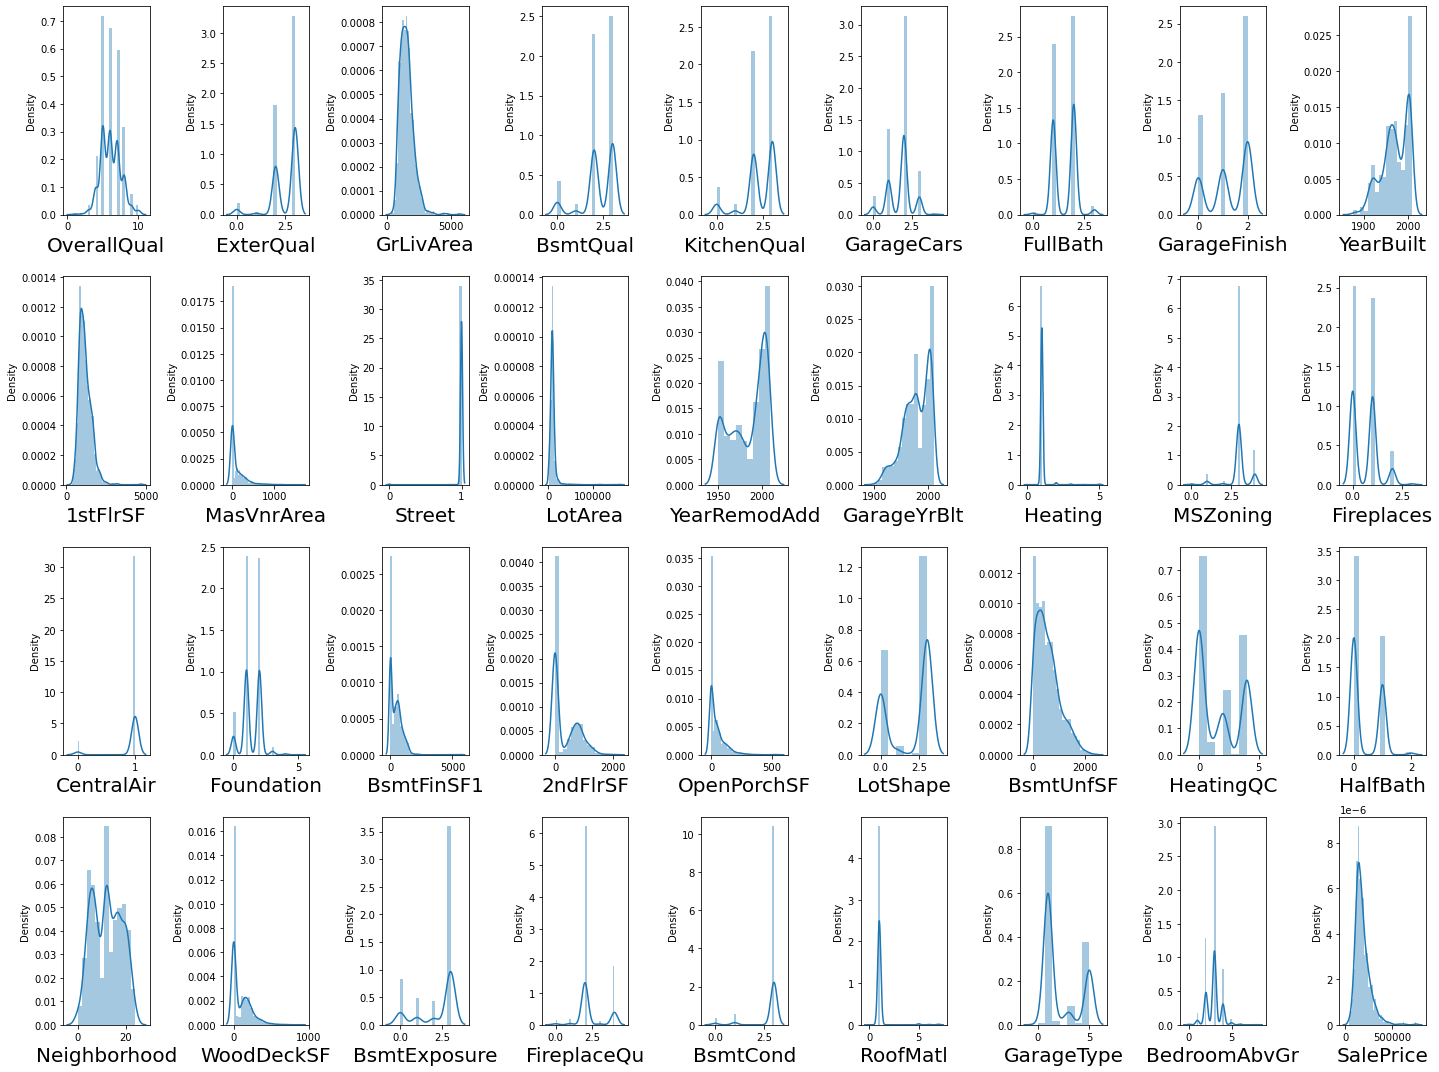

In [34]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.distplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Some columns are not normally distributed.

**- Outliers.**

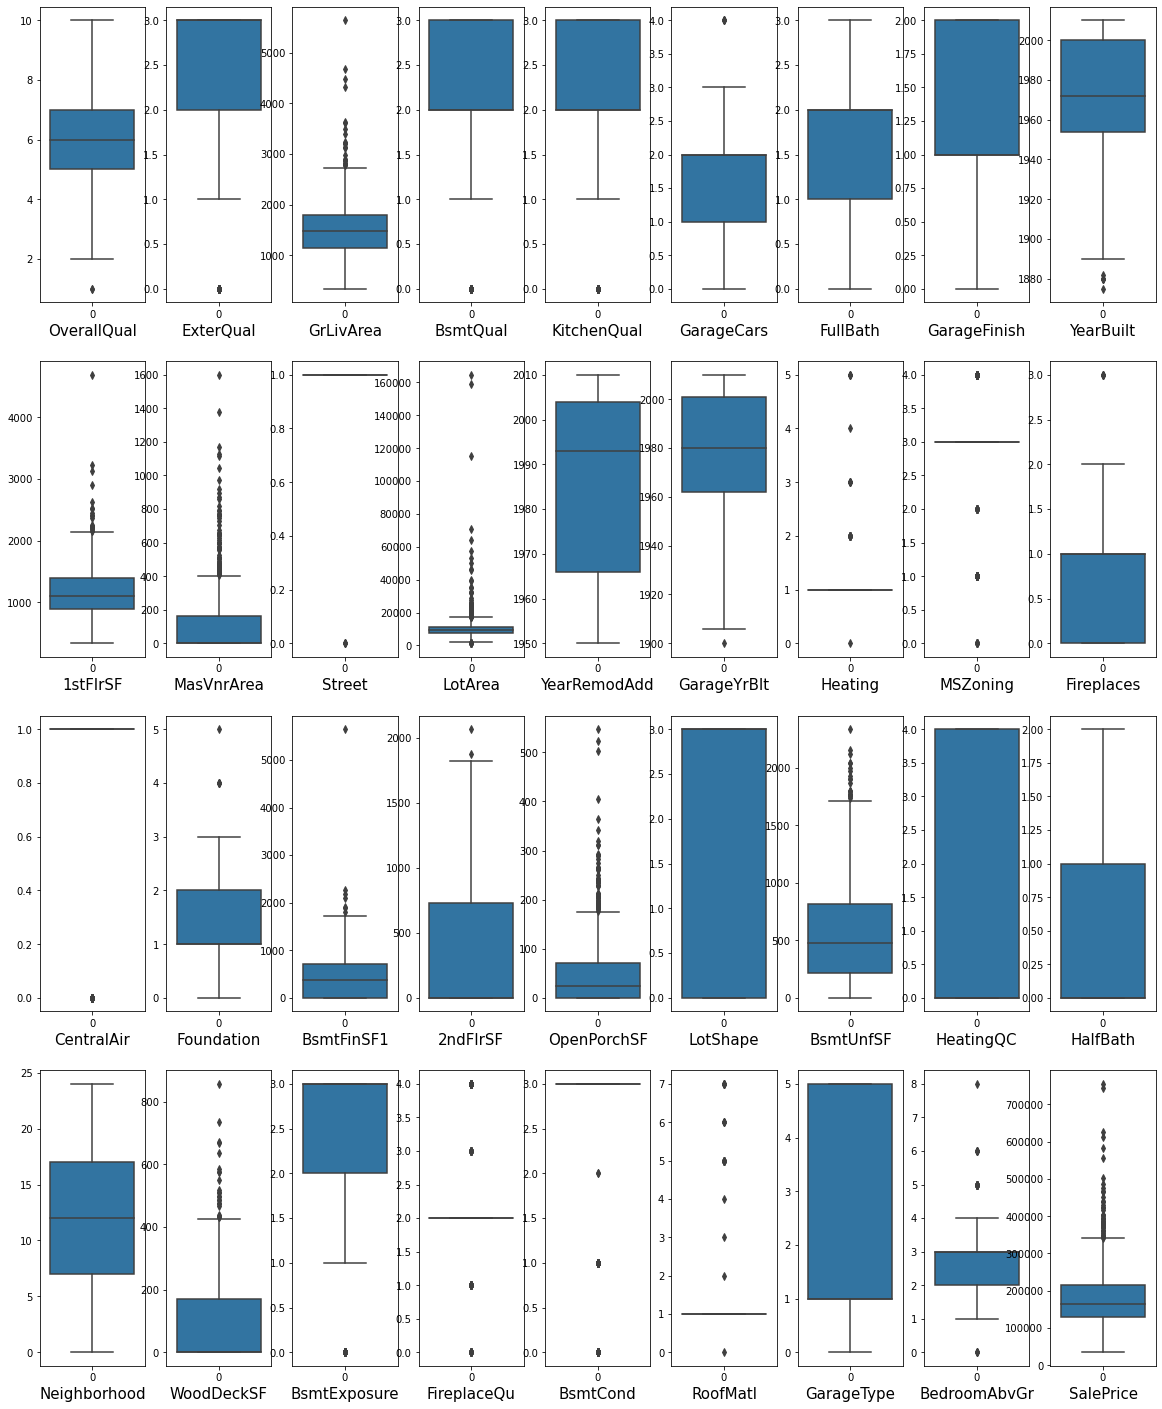

In [35]:
plt.figure(figsize = (20,25))
graph = 1
for column in top:
    if graph <= 36:
        plt.subplot(4,9,graph)
        ax = sns.boxplot(data = top[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Outliers are present in some of the columns.

**- Removing outliers.**

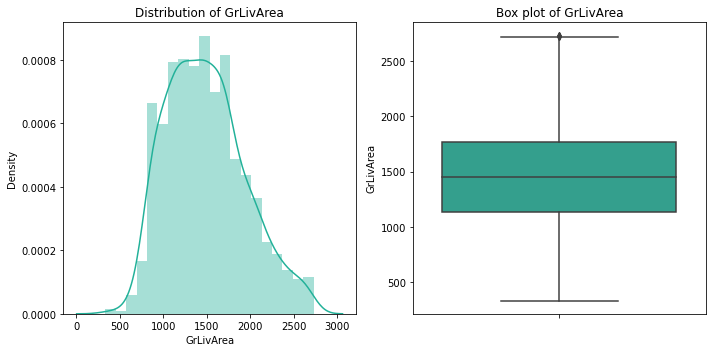

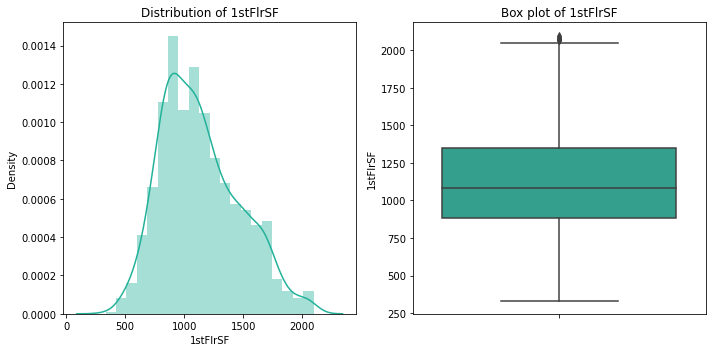

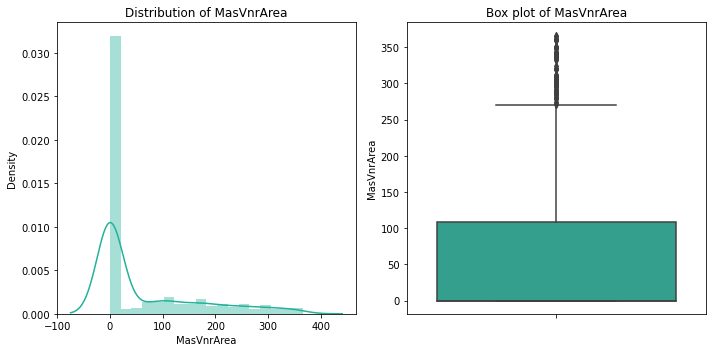

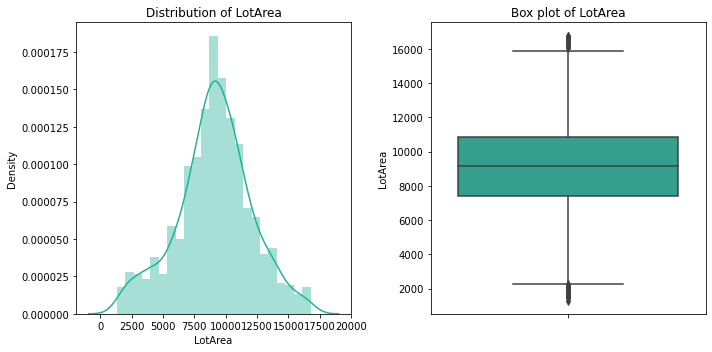

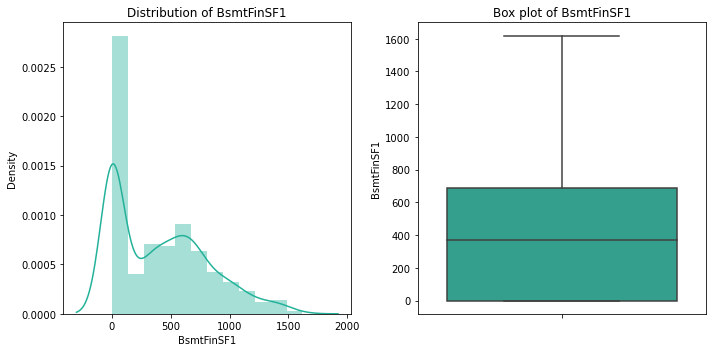

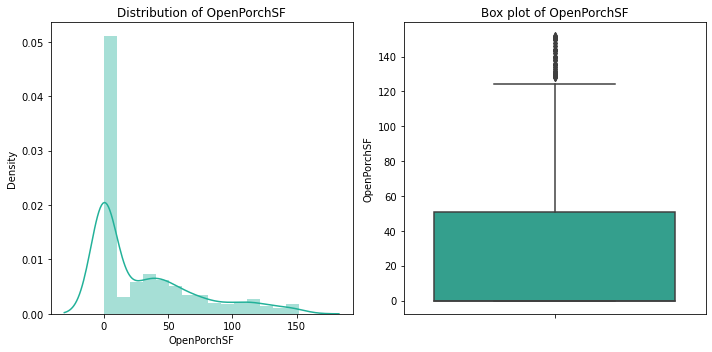

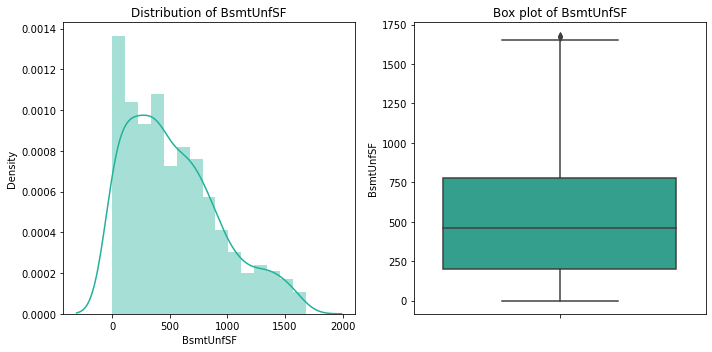

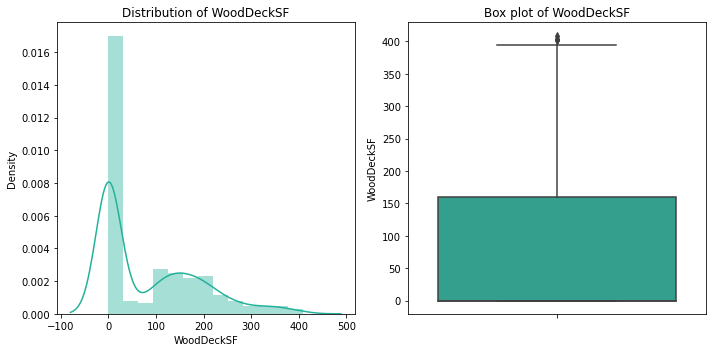

(923, 36)


In [36]:
def remove_outliers(x):
    global top
    Q1= top[x].quantile(0.25)
    Q3 = top[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(top[x] > upper_limit)
    top = top.drop(top.index[index])
    top.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(top[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=top[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['GrLivArea','1stFlrSF','MasVnrArea','LotArea','BsmtFinSF1','OpenPorchSF','BsmtUnfSF','WoodDeckSF']:
    remove_outliers(i)
print(top.shape)

OUR FINAL DATASET IS NOW NORMALLY DISTRIBUTED & REMOVED OUTLIERS, AND AFTER REMOVING THE OUTLIERS, SHAPE OF OUR DATASET IS 923, 36. 

## Model Building.

**- Seperating the Features & Target of Top Features.**

In [37]:
x_top = top.drop('SalePrice',axis = 1)
y_top = top.SalePrice

**- Scaling the Features.**

In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_top)

**- Train Test Split.**

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_top,test_size=0.20,random_state=90)

**- Function for Training & Testing.**

In [40]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evalution ----- \n')
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
        print('\n Scatter Plot \n')
        plt.scatter(y_test, pred)
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [41]:
lr = LinearRegression()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
hgb = HistGradientBoostingRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()

NameError: name 'XGBRegressor' is not defined

**- Linear Regression.**

In [ ]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Regressor.**

In [ ]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Regressor.**

In [ ]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Regressor.**

In [ ]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- HistGradientBoosting Regressor.**

In [ ]:
hgb.fit(x_train,y_train)
score(hgb, x_train,x_test,y_train,y_test,train = True)
score(hgb, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Regressor.**

In [ ]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

            GradientBoosting Regressor, is giving the best score among all other models.

## Hyperparameter Tuning.

In [ ]:
gb.get_params()

In [ ]:
param = {'n_estimators':range(0,100,10),
         'learning_rate':[0.1,0.3,0.5,0.7,0.8,1.0],
         'criterion':['friedman_mse', 'squared_error'],
         'loss':['squared_error', 'absolute_error'],
         'random_state':range(1,10),
         'max_features':['auto', 'sqrt']}

In [ ]:
grid = GridSearchCV(gb,param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
gb_hyp = GradientBoostingRegressor(criterion = 'friedman_mse',learning_rate =  0.1,loss = 'squared_error',
                                   max_features = 'sqrt',n_estimators = 90,random_state = 2)

In [ ]:
gb_hyp.fit(x_train,y_train)
score(gb_hyp, x_train,x_test,y_train,y_test,train = True)
score(gb_hyp, x_train,x_test,y_train,y_test,train = False)

       Post Tuning score is best then the default parameters.

## Testing Dataset.

In [ ]:
house_test = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/Flip Robo/Dataset/Project-Housing_splitted/test.csv')
house_test.head()

In [ ]:
house_test.columns[house_test.isnull().any()]

In [ ]:
house_test.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)

In [ ]:
house_test['MasVnrArea'] = house_test['MasVnrArea'].fillna(house_test['MasVnrArea'].mean())

In [ ]:
house_test['LotFrontage'] = house_test['LotFrontage'].fillna(house_test['LotFrontage'].median())
house_test['GarageYrBlt'] = house_test['GarageYrBlt'].fillna(house_test['GarageYrBlt'].median())

In [ ]:
def fill(x):
    house_test[x] = house_test[x].fillna(house_test[x].mode()[0])

In [ ]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence','Electrical']

In [ ]:
for i in n:
    fill(i)

In [ ]:
house_test.columns[house_test.isnull().any()]

In [ ]:
house_test.drop('Utilities',axis = 1, inplace = True )

In [ ]:
ob_test = []
for col in house_test:
    if house_test[col].dtype == 'object':
        ob_test.append(col)

In [ ]:
lb = LabelEncoder()
for i in ob_test:
    house_test[i] = lb.fit_transform(house_test[i])

In [ ]:
top_test = house_test[['OverallQual','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
                       'GarageFinish','YearBuilt','1stFlrSF','MasVnrArea','Street','LotArea',
                       'YearRemodAdd','GarageYrBlt','Heating','MSZoning','Fireplaces','CentralAir',
                       'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC',
                       'HalfBath','Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl',
                       'GarageType','BedroomAbvGr']]

In [ ]:
'TotRmsAbvGrd','GarageArea','TotalBsmtSF'

In [ ]:
top_test

In [ ]:
y_pred = gb_hyp.predict(top_test)

In [ ]:
a = []
for i in y_pred:
    a.append(i)

In [ ]:
test = pd.DataFrame({'TEST' : a})
test.head(50)

## Saving the Model.

In [ ]:
filename = 'House_model.pickle'
pickle.dump(gb_hyp, open(filename, 'wb'))